In [1]:
%%markdown

# Bell test

## Coincidence analysis

We start by choosing a channel, and for each arrival time in it we select the closest one for the other channel. 
We then record the difference between these two times, and make a histogram for these time differences. 

Here we show a plot of the histogram obtained with the $ab|xy = 00|00$ configuration (the counts are on a log scale in order to better show the noise). 

The histogram is fitted with a Gaussian; the events which fall within 5 standard deviations are selected as corresponding to coincidences (and shown in a darker colour).


# Bell test

## Coincidence analysis

We start by choosing a channel, and for each arrival time in it we select the closest one for the other channel. 
We then record the difference between these two times, and make a histogram for these time differences. 

Here we show a plot of the histogram obtained with the $ab|xy = 00|00$ configuration (the counts are on a log scale in order to better show the noise). 

The histogram is fitted with a Gaussian; the events which fall within 5 standard deviations are selected as corresponding to coincidences (and shown in a darker colour).


Analyzing file data/x0a0_y0b0.txt
Found a mean of 0.48375382464225974 and a std of 1.3580032220662412
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


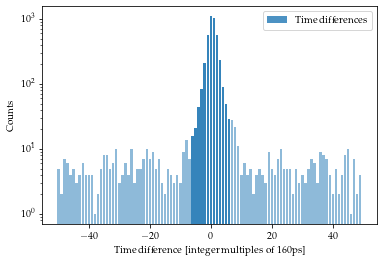

Observed 4020 counts
Observation time is approximately 8.00 s


In [2]:
from coincidence_count import count_coincidences

counts, obs_time = count_coincidences('data/x0a0_y0b0.txt', plot=True)

print(f'Observed {counts} counts')
print(f'Observation time is approximately {obs_time:.2f}')

In [3]:
%%markdown

The number of coincidences is calculated as the area within $5\sigma$ 
in this histogram, which as one can see corresponds to the region in which 
the tails of the peak start being compatible with the background.

It would be possible to subtract from the coincidences the expected background in the corresponding region;
we choose the conservative option of counting all the events in the time interval as coincidences.

Assuming the counts are independent, we associate a Poissonian error of $\sqrt{N}$
to a count of $N$ events.
Since the time for which the detector is turned on is not constant for each configuration, 
so we normalize: the observation time $t$ is calculated by taking the difference of the first and last 
observed counts; we report rates such as 
$$
r = \frac{N \pm \sqrt{N}}{t}
\,.
$$

These will be directly comparable between different measurements. 

We repeat the same sort of analysis for all the configurations we wish to analyze --- in this case, all the 16 $ab|xy$ possibilities. 
The standard deviations and means of the Gaussians corresponding to these are quite similar;
in order to have a consistent definition of "coincidence" throughout we take the average of the means and of the standard deviations, and use those to select coincidences everywhere.

This yields an array of rates: it is expressed here as a multidimensional array with four indices, with 
`r[x, y, a, b]` representing the rate of the configuration $ab | xy$, to be interpreted in the unit Hertz. 

Each element of this array is a `ufloat` object from the library [uncertainties](https://pythonhosted.org/uncertainties/index.html),
which implements automatic Gaussian error propagation for simple operations. 
A `ufloat` is characterized by its nominal value and the corresponding standard deviation.


The number of coincidences is calculated as the area within $5\sigma$ 
in this histogram, which as one can see corresponds to the region in which 
the tails of the peak start being compatible with the background.

It would be possible to subtract from the coincidences the expected background in the corresponding region;
we choose the conservative option of counting all the events in the time interval as coincidences.

Assuming the counts are independent, we associate a Poissonian error of $\sqrt{N}$
to a count of $N$ events.
Since the time for which the detector is turned on is not constant for each configuration, 
so we normalize: the observation time $t$ is calculated by taking the difference of the first and last 
observed counts; we report rates such as 
$$
r = \frac{N \pm \sqrt{N}}{t}
\,.
$$

These will be directly comparable between different measurements. 

We repeat the same sort of analysis for all the configurations we wish to analyze --- in this case, all the 16 $ab|xy$ possibilities. 
The standard deviations and means of the Gaussians corresponding to these are quite similar;
in order to have a consistent definition of "coincidence" throughout we take the average of the means and of the standard deviations, and use those to select coincidences everywhere.

This yields an array of rates: it is expressed here as a multidimensional array with four indices, with 
`r[x, y, a, b]` representing the rate of the configuration $ab | xy$, to be interpreted in the unit Hertz. 

Each element of this array is a `ufloat` object from the library [uncertainties](https://pythonhosted.org/uncertainties/index.html),
which implements automatic Gaussian error propagation for simple operations. 
A `ufloat` is characterized by its nominal value and the corresponding standard deviation.


In [4]:
from analysis import compute_rates

# the code to compute all the rates is as follows: 

# r = compute_rates()
# np.save('r.npy', r)

# it takes a couple minutes to run, so we load the results 
# from a pre-computed file instead

r = np.load('r.npy', allow_pickle=True)
print(r)

[[[[502.46178899940713+/-7.924831077887774
    90.70642745509008+/-3.1753600964673527]
   [105.23962051624231+/-3.2967968107522716
    418.6936910474345+/-6.936922320252932]]

  [[486.3769290768097+/-7.512116757098339
    68.71072606230125+/-2.766189673463543]
   [60.067423224158844+/-2.6889871642533874
    485.34809793957754+/-7.86924520043674]]]


 [[[474.5912182224096+/-7.138526287665419
    85.67303738484179+/-2.9577617199208186]
   [113.80235151251406+/-3.7704401164247856
    434.6422658033621+/-7.2239988930138495]]

  [[142.57860465948932+/-3.8949506642064415
    407.13771425666425+/-7.130706053764711]
   [445.94317775497905+/-7.394484003114401
    111.35177068496151+/-3.6933051009090376]]]]


In [5]:
# as an example, here are the rates corresponding to the 
# ab|xy = 00|00 and 11|00 configurations

print(f'Rate(00|00) = ({r[0,0,0,0]})Hz')
print(f'Rate(11|00) = ({r[0,0,1,1]})Hz')

# we can add these: 
print(f'Rate(00|00) + Rate(11|00) = ({r[0,0,1,1] + r[0,0,0,0]})Hz')

Rate(00|00) = (502+/-8)Hz
Rate(11|00) = (419+/-7)Hz
Rate(00|00) + Rate(11|00) = (921+/-11)Hz


In [6]:
%%markdown

## Bell test analysis

In order to write the CHSH observable we need to calculate the expectation value of a combined observable, defined by the pair $xy$.
This is accomplished by the function `expected_value`: we sum the rates for which the observables have the same value,
subtract the ones for which they have opposite values, and normalize by the total.

The CHSH observable is obtained as an algebraic sum of these, with three positive signs and a negative one.


## Bell test analysis

In order to write the CHSH observable we need to calculate the expectation value of a combined observable, defined by the pair $xy$.
This is accomplished by the function `expected_value`: we sum the rates for which the observables have the same value,
subtract the ones for which they have opposite values, and normalize by the total.

The CHSH observable is obtained as an algebraic sum of these, with three positive signs and a negative one.


In [7]:
from analysis import expected_value, CHSH

for x in range(2):
    for y in range(2):
        print(f'x = {x}, y = {y}')
        print(f'Expected value = {expected_value(x, y, r)}\n')

print(f'CHSH = {CHSH(r)}')
sigmas_violation = (CHSH(r).n - 2) / CHSH(r).s

print(f'This violates the Bell inequalities by {sigmas_violation:.0f} sigmas')

x = 0, y = 0
Expected value = 0.649+/-0.008

x = 0, y = 1
Expected value = 0.766+/-0.007

x = 1, y = 0
Expected value = 0.640+/-0.008

x = 1, y = 1
Expected value = -0.541+/-0.009

CHSH = 2.597+/-0.015
This violates the Bell inequalities by 39 sigmas
